# Fun with the SMI

In [ ]:
import pandas as pd
import cvxpy as cvx
%matplotlib inline
pd.options.display.max_rows=20

In [2]:
prices = pd.read_csv("prices.csv", index_col=0)

returns=prices.pct_change().fillna(0.0)
returns

,ABB Ltd,Adecco Group AG,Julius Baer Group Ltd.,Compagnie Financière Richemont SA,Credit Suisse Group AG,Geberit AG,Givaudan SA,LafargeHolcim Ltd,Lonza Group Ltd,Nestlé S.A.,Novartis AG,Roche Holding AG,Swisscom AG,SGS SA,Sika AG,Swiss Life Holding AG,Swiss Re Ltd,UBS Group AG,The Swatch Group AG,Zurich Insurance Group AG
Date,,,,,,,,,,,,,,,,,,,,
2017-09-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-09-07,0.002201,0.005739,-0.000938,-0.007950,-0.005722,0.005920,0.000997,-0.010563,-0.004455,-0.002468,-0.000617,-0.005731,0.004839,0.008276,0.002168,0.006033,0.009130,0.109335,-0.003664,0.005025
2017-09-06,-0.001757,-0.005706,0.001878,-0.014310,0.007914,-0.007469,-0.017919,-0.004448,-0.013426,-0.003711,-0.010500,-0.001235,-0.005235,-0.007752,-0.019466,0.005697,0.010253,-0.103170,-0.013922,0.001786
2017-09-05,-0.005279,0.000717,-0.005623,-0.001161,-0.006424,0.000000,0.002027,0.009830,0.006186,0.004966,0.000000,-0.001237,0.001894,-0.018382,0.000000,0.005665,0.008955,-0.003213,0.004795,0.007130
2017-09-04,-0.007077,0.001434,0.006598,-0.012791,0.005747,-0.000228,-0.002023,0.006195,-0.003688,-0.008647,-0.000624,0.001651,0.003361,0.002809,0.010294,0.014527,0.015976,0.012250,0.002121,0.008850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-09,-0.012206,-0.007158,-0.005478,-0.038082,0.001259,-0.001219,0.010840,-0.004638,-0.003957,0.005383,-0.005305,-0.006163,0.009309,0.007626,0.002500,0.009514,0.002087,0.001192,-0.027559,0.001760
2017-01-06,0.004119,0.000721,0.013983,-0.011730,-0.001257,0.001464,0.002145,0.009320,0.003814,-0.001339,-0.003333,-0.002480,0.001931,-0.006149,-0.004987,0.004039,0.007809,0.011905,-0.027094,0.003514
2017-01-05,-0.007748,0.000720,0.011910,-0.018546,-0.008185,0.000975,0.002675,-0.003693,-0.004338,-0.006702,0.002007,-0.000414,-0.000642,0.001428,0.014408,-0.001006,0.002583,-0.001765,-0.005762,0.000700


In [3]:
print(100*16*returns.std().sort_values())

Swisscom AG                          10.459893
Zurich Insurance Group AG            12.313890
SGS SA                               12.347453
Nestlé S.A.                          13.516935
Givaudan SA                          14.372907
Novartis AG                          14.821473
Swiss Re Ltd                         14.925935
Geberit AG                           15.145644
Swiss Life Holding AG                15.185304
ABB Ltd                              15.661099
Roche Holding AG                     15.859774
Sika AG                              15.973533
Adecco Group AG                      17.553021
Julius Baer Group Ltd.               18.698889
LafargeHolcim Ltd                    19.742912
Compagnie Financière Richemont SA    20.177269
Lonza Group Ltd                      20.747507
The Swatch Group AG                  21.764102
Credit Suisse Group AG               23.839416
UBS Group AG                         57.035049
dtype: float64


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

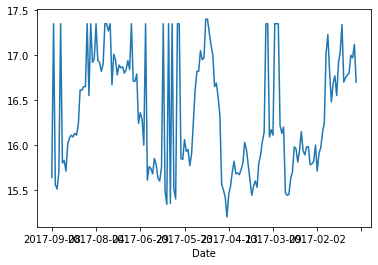

In [3]:
# Severe problems with data quality here...
prices["UBS Group AG"].plot()

In [4]:
def min_var(matrix):
    w = cvx.Variable(matrix.shape[1])
    
    cvx.Problem(cvx.Minimize(cvx.norm(matrix.values*w,2)), 
                [0 <= w, cvx.sum(w) == 1]).solve()
    
    return 100*pd.Series(index=matrix.keys(), data=w.value).sort_values()

min_var(returns).map('{:,.2f}%'.format)

/opt/conda/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


Lonza Group Ltd                       0.00%
LafargeHolcim Ltd                     0.00%
The Swatch Group AG                   0.00%
Julius Baer Group Ltd.                0.00%
Credit Suisse Group AG                0.00%
Swiss Life Holding AG                 0.00%
Geberit AG                            0.00%
ABB Ltd                               0.00%
UBS Group AG                          0.32%
Swiss Re Ltd                          1.00%
Roche Holding AG                      1.91%
Adecco Group AG                       2.92%
Novartis AG                           3.66%
Compagnie Financière Richemont SA     3.69%
Nestlé S.A.                           6.29%
SGS SA                                7.52%
Sika AG                              10.53%
Givaudan SA                          12.47%
Zurich Insurance Group AG            14.77%
Swisscom AG                          34.92%
dtype: object

In [5]:
def ridge(matrix, lamb_balance=0):
    def __objective():
        return cvx.Minimize(cvx.norm(matrix.values*w,2) + 
                            lamb_balance*cvx.norm(w,2))

    w = cvx.Variable(matrix.shape[1])
    cvx.Problem(__objective(), [0 <= w, cvx.sum(w) == 1]).solve()
    return 100*pd.Series(index=matrix.keys(), data=w.value).sort_values()

ridge(returns, 1).map('{:,.2f}%'.format)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/conda/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


UBS Group AG                         3.02%
Credit Suisse Group AG               4.27%
The Swatch Group AG                  4.43%
Lonza Group Ltd                      4.57%
LafargeHolcim Ltd                    4.63%
Julius Baer Group Ltd.               4.75%
Compagnie Financière Richemont SA    4.86%
ABB Ltd                              4.90%
Swiss Life Holding AG                4.92%
Adecco Group AG                      4.94%
Geberit AG                           5.18%
Swiss Re Ltd                         5.20%
Roche Holding AG                     5.25%
Zurich Insurance Group AG            5.37%
Novartis AG                          5.39%
Sika AG                              5.49%
SGS SA                               5.56%
Nestlé S.A.                          5.67%
Givaudan SA                          5.73%
Swisscom AG                          5.86%
dtype: object

In [6]:
def ElasticNet(matrix, w0, lamb_balance=0, lamb_trades=0):

    def __objective():
        return cvx.Minimize(cvx.norm(matrix.values*w,2) + 
                            lamb_balance*cvx.norm(w,2) + 
                            lamb_trades*cvx.norm(w-w0,1))

    w = cvx.Variable(matrix.shape[1])
    cvx.Problem(__objective(), [0 <= w, cvx.sum(w) == 1]).solve()
    return 100*pd.Series(index=matrix.keys(), data=w.value).sort_values()

ElasticNet(returns, w0=0.05, lamb_balance=1, lamb_trades=0.03).map('{:,.2f}%'.format)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/conda/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


UBS Group AG                         3.63%
Credit Suisse Group AG               5.00%
The Swatch Group AG                  5.00%
Lonza Group Ltd                      5.00%
LafargeHolcim Ltd                    5.00%
Julius Baer Group Ltd.               5.00%
Compagnie Financière Richemont SA    5.00%
ABB Ltd                              5.00%
Swiss Life Holding AG                5.00%
Adecco Group AG                      5.00%
Swiss Re Ltd                         5.00%
Geberit AG                           5.00%
Roche Holding AG                     5.00%
Zurich Insurance Group AG            5.00%
Novartis AG                          5.01%
Sika AG                              5.10%
SGS SA                               5.17%
Nestlé S.A.                          5.28%
Givaudan SA                          5.34%
Swisscom AG                          5.46%
dtype: object

In [7]:
def ElasticNet(matrix, w0, lamb_balance=0, lamb_trades=0):

    def __objective():
        return cvx.Minimize(cvx.norm(matrix.values*w,2) + 
                            lamb_balance*cvx.norm(w,2) + 
                            lamb_trades*cvx.norm(w-w0,1))

    w = cvx.Variable(matrix.shape[1])
    cvx.Problem(__objective(), [0 <= w, cvx.sum(w) == 1]).solve()
    return 100*pd.Series(index=matrix.keys(), data=w.value).sort_values()

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
